In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import math

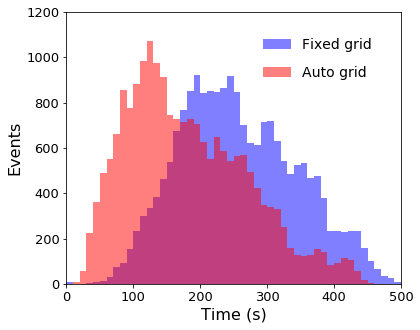


Number of fixed grid runs = 20000
Number of auto grid runs = 20000

Mean runtime (fixed) = 257.1 seconds
Mean runtime (auto)  = 181.0 seconds

Max runtime (fixed) = 608.0 seconds
Max runtime (auto)  = 476.0 seconds

Speedup = 1.42

Mean time per step (fixed) = 0.5 seconds
Mean time per step (auto)  = 0.337 seconds

Mean steps (fixed) = 515.0
Mean steps (auto)  = 515.0


In [23]:
parameter_samples = 200   # fixed

runtime_fixed = []
steps_fixed = []
time_per_step_fixed = []

runtime_auto  = []
steps_auto = []
time_per_step_auto = []

for i in range(0, parameter_samples):
    fixed_dir = 'launch/fixed_grid/benchmarks/benchmarks_' + str(i+1) + '.dat' 
    auto_dir  = 'launch/auto_grid/benchmarks/benchmarks_' + str(i+1) + '.dat' 
    
    if os.path.exists(fixed_dir):
        benchmarks = np.loadtxt(fixed_dir).reshape(-1, 5)
        runtime_fixed = np.append(runtime_fixed, benchmarks[:,1])
        steps_fixed = np.append(steps_fixed, benchmarks[:,2])
        time_per_step_fixed = np.append(time_per_step_fixed, benchmarks[:,3])
        
        
    if os.path.exists(auto_dir):
        benchmarks = np.loadtxt(auto_dir)
        if hydro_mode == 'vah':
            benchmarks = benchmarks.reshape(-1, 5)    # new data format
       
        runtime_auto = np.append(runtime_auto, benchmarks[:,1])
        steps_auto = np.append(steps_auto, benchmarks[:,2])
        time_per_step_auto = np.append(time_per_step_auto, benchmarks[:,3])

tmax = 500
plt.figure(figsize=(6,5))
plt.rc('xtick', labelsize=13)   
plt.rc('ytick', labelsize=13)    
plt.hist(runtime_fixed, bins = 50, alpha = 0.5, range = [0, tmax], label = 'Fixed grid', color = 'blue')
plt.hist(runtime_auto,  bins = 50, alpha = 0.5, range = [0, tmax], label = 'Auto grid', color = 'red')
plt.xlabel("Time (s)", fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.xlim([0, tmax])
plt.ylim([0., 1200])
plt.xticks([0, 0.2*tmax, 0.4*tmax, 0.6*tmax, 0.8*tmax, tmax])
plt.legend(prop={'size': 14}, frameon=False, bbox_to_anchor=(0.95,0.95), labelspacing=1)
plt.show()
print()
print('Number of fixed grid runs =', len(runtime_fixed))   
print('Number of auto grid runs =', len(runtime_auto))
print()
print('Mean runtime (fixed) =', round(runtime_fixed.mean(), 1), 'seconds')
print('Mean runtime (auto)  =', round(runtime_auto.mean(), 1),  'seconds')
print()
print('Max runtime (fixed) =', round(runtime_fixed.max()),  'seconds')
print('Max runtime (auto)  =', round(runtime_auto.max()),   'seconds')
print()
print('Speedup =', round(runtime_fixed.mean() / runtime_auto.mean(), 2))
print()
print('Mean time per step (fixed) =', round(time_per_step_fixed.mean(), 3), 'seconds')
print('Mean time per step (auto)  =', round(time_per_step_auto.mean(), 3),  'seconds')
print()
print('Mean steps (fixed) =', round(steps_fixed.mean()))
print('Mean steps (auto)  =', round(steps_auto.mean()))